In [1]:
import numpy as np
from numpy.linalg import inv
import fsps
import pandas as pd
from vtl.Readfile import Readfile
from spec_id import RT_spec,Gen_spec, Analyze_LH_lwa,Median_w_Error_cont,Leave_one_out
import matplotlib.pyplot as plt
from astropy.cosmology import Planck13, z_at_value
from astropy.table import Table
from astropy.io import fits
import astropy
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)
ultau=np.append([0],10**(np.array(tau[1:])-9))

In [3]:
def IMF_test(Z,t,ultau): 
    sp = fsps.StellarPopulation(imf_type=0,tpagb_norm_type=0,zcontinuous=1,
                            logzsol=np.log10(Z/0.019), sfh=4,tau=ultau)
    swv,sfl = sp.get_spectrum(tage=t,peraa=True)

    cp = fsps.StellarPopulation(imf_type=1,tpagb_norm_type=0,zcontinuous=1,
                            logzsol=np.log10(Z/0.019), sfh=4,tau=ultau)
    cwv,cfl = sp.get_spectrum(tage=t,peraa=True)   
    return swv,sfl,cwv,cfl

In [14]:
swv,sfl,cwv,cfl = IMF_test(0.019,5.,ultau[5])

(3000, 6000)

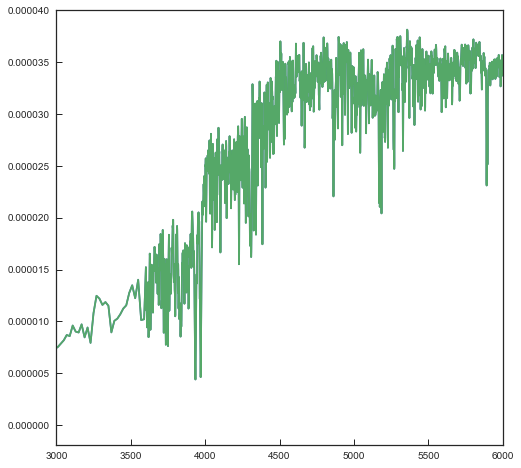

In [15]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(swv,sfl)
plt.plot(cwv,cfl)
plt.xlim(3000,6000)